In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
X = pd.read_csv('X.csv')
X.corr()

,Unnamed: 0,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
Unnamed: 0,1.000000,-0.793168,-0.519879,-0.222182,-0.091574,-0.284841,-0.233837,-0.153890,0.047254,-0.491924
production_budget,-0.793168,1.000000,0.735318,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154,0.642562
worldwide_gross,-0.519879,0.735318,1.000000,0.111144,0.033700,0.253027,0.205110,0.125527,0.193667,0.897468
title_year,-0.222182,0.207884,0.111144,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685,0.014154
aspect_ratio,-0.091574,0.077459,0.033700,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765,0.030225
duration,-0.284841,0.276407,0.253027,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642,0.238216
cast_total_facebook_likes,-0.233837,0.236820,0.205110,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663,0.208941
budget,-0.153890,0.185357,0.125527,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417,0.102666
imdb_score,0.047254,0.033154,0.193667,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000,0.201331
gross,-0.491924,0.642562,0.897468,0.014154,0.030225,0.238216,0.208941,0.102666,0.201331,1.000000


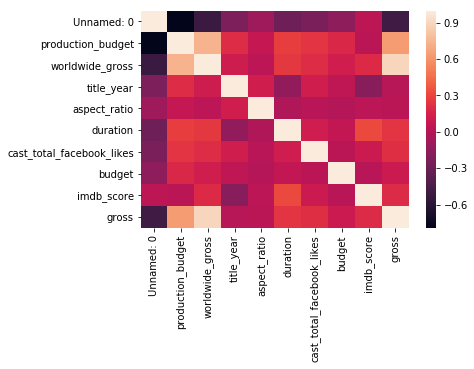

In [7]:
sns.heatmap(X.corr())

# La maldicion de las dimensiones
La intuición no funciona bien en dimensiones superiores a la 3ra dimension

array([ 0.1       ,  0.31622777,  0.46415888,  0.56234133,  0.63095734,
        0.68129207,  0.71968567,  0.74989421,  0.77426368,  0.79432823,
        0.81113083,  0.82540419,  0.83767764,  0.8483429 ])

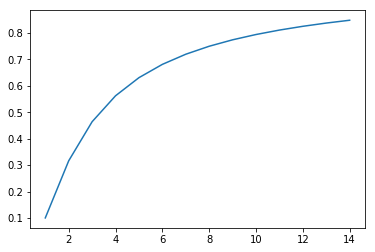

In [9]:
x = np.arange(1,15)
y = np.power(0.1,1/x)
plt.plot(x,y)
y

A medida que aumenta la dimension de las features, son necesarios mas datos para "cubrir" el modelo


In [10]:
X = X.drop('Unnamed: 0',axis=1)
Y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

model = Lasso()
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [20]:
len(y_train)/len(Y)

0.75

In [21]:
model.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
model.score(x_test,y_test)

0.87298960573173889

In [23]:
model.coef_

array([  1.12030735e+00,   7.97021743e+05,  -4.56764564e+06,
         1.89324693e+04,  -1.66687509e+02,   2.00960048e-04,
         7.94506342e+06,   1.95463491e+00])

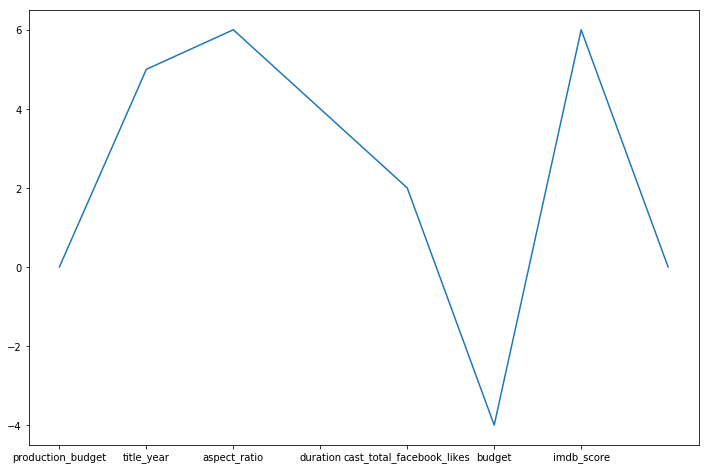

In [26]:
var = np.floor(np.log10(np.abs(model.coef_)))
plt.rcParams["figure.figsize"] = [12,8]
plt.xticks(np.arange(7),list(X.columns))
plt.plot(var)

# Correlacion entre variables

Si una variable feature tiene mucha correlacion con la variable objetivo es una variable informativa

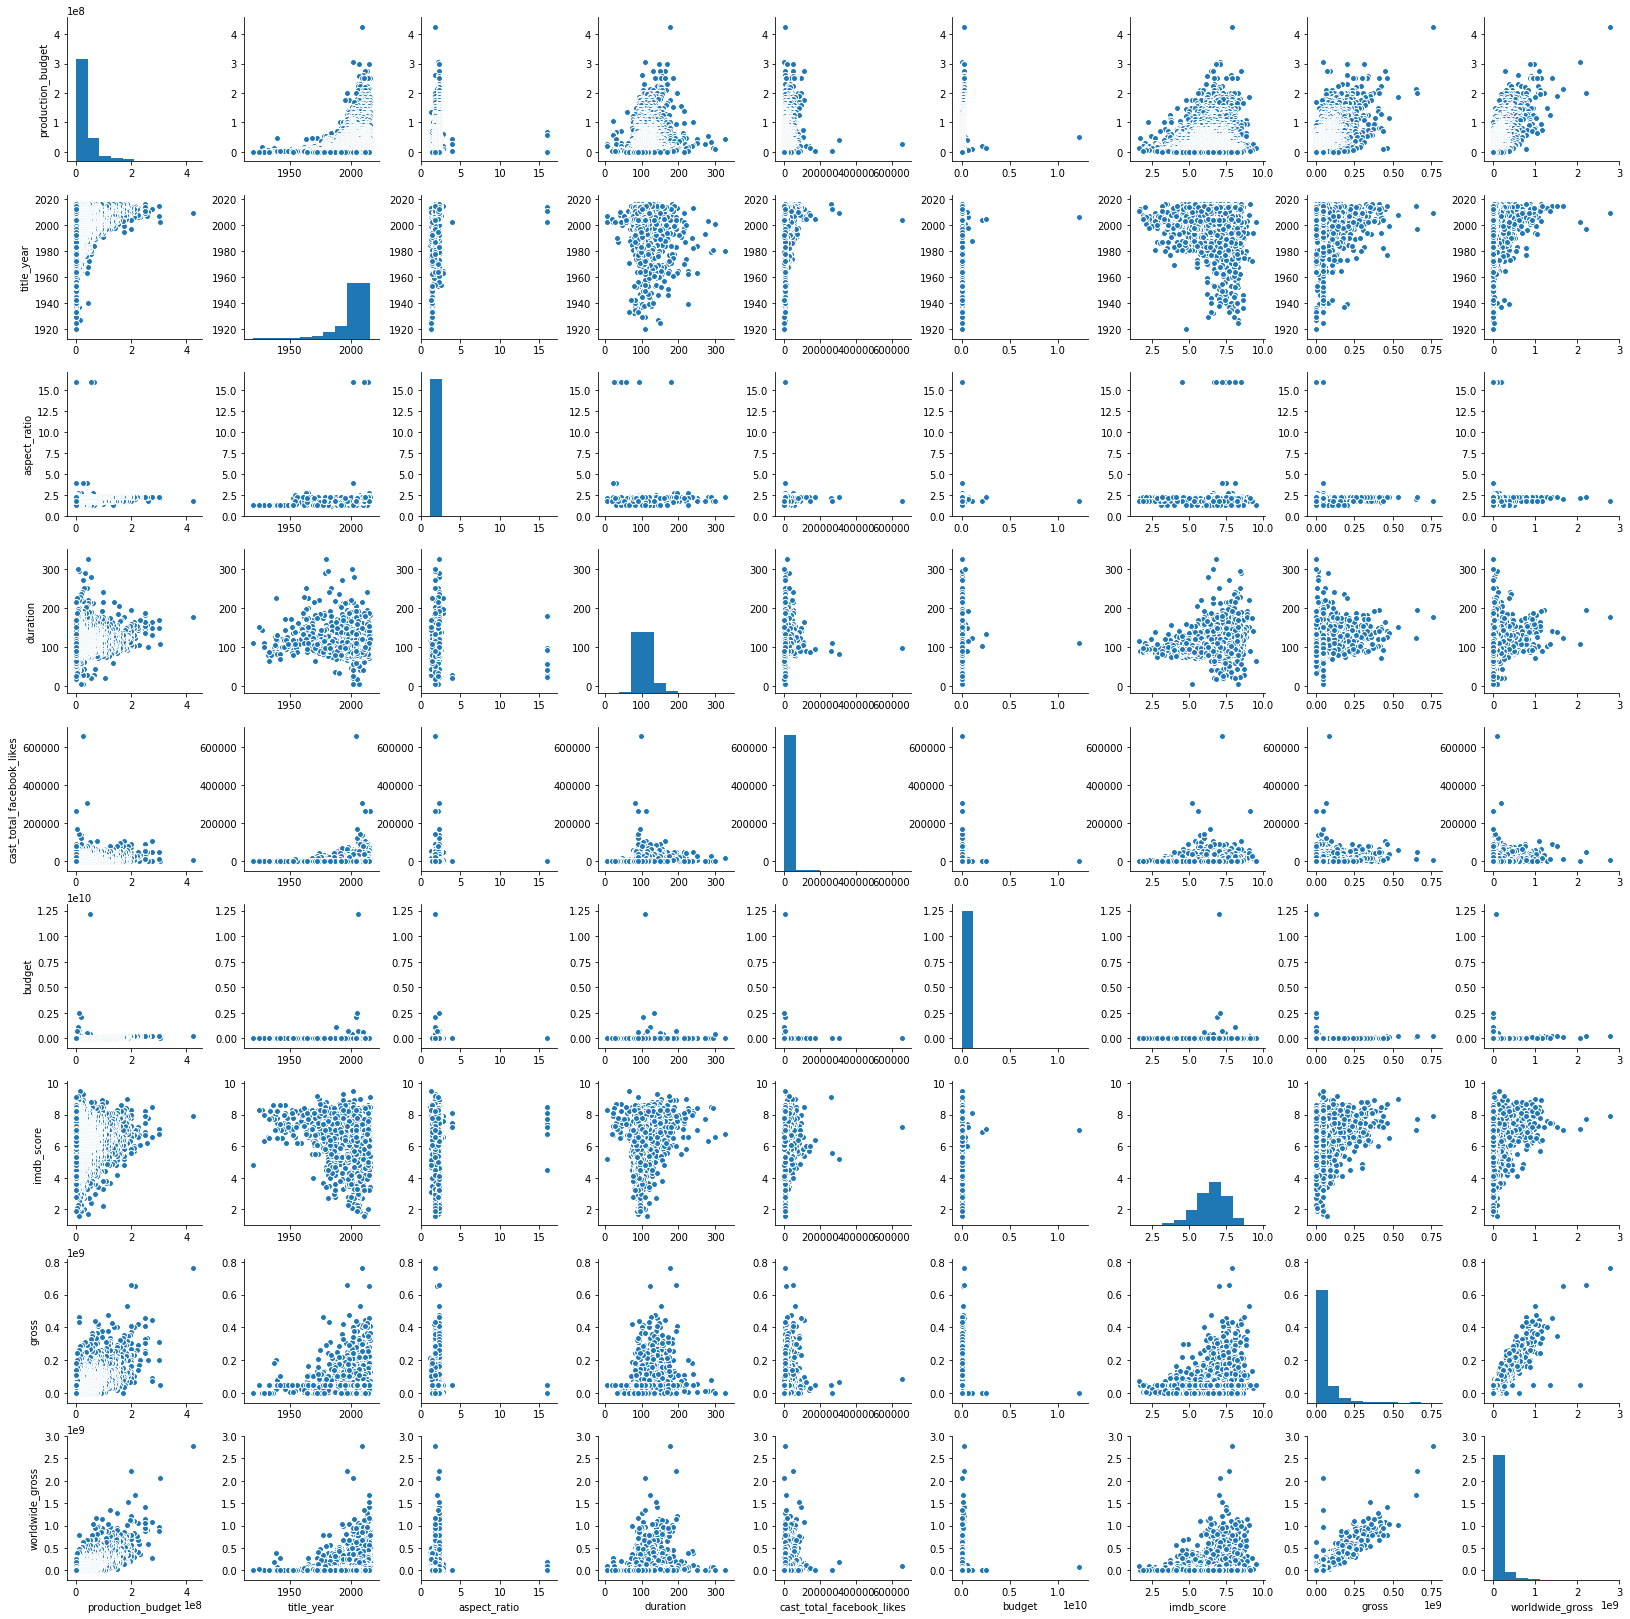

In [27]:
z = pd.concat([X,Y],axis=1)
sns.pairplot(z)

In [33]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
z2 = pd.concat([X,clase],axis=1)

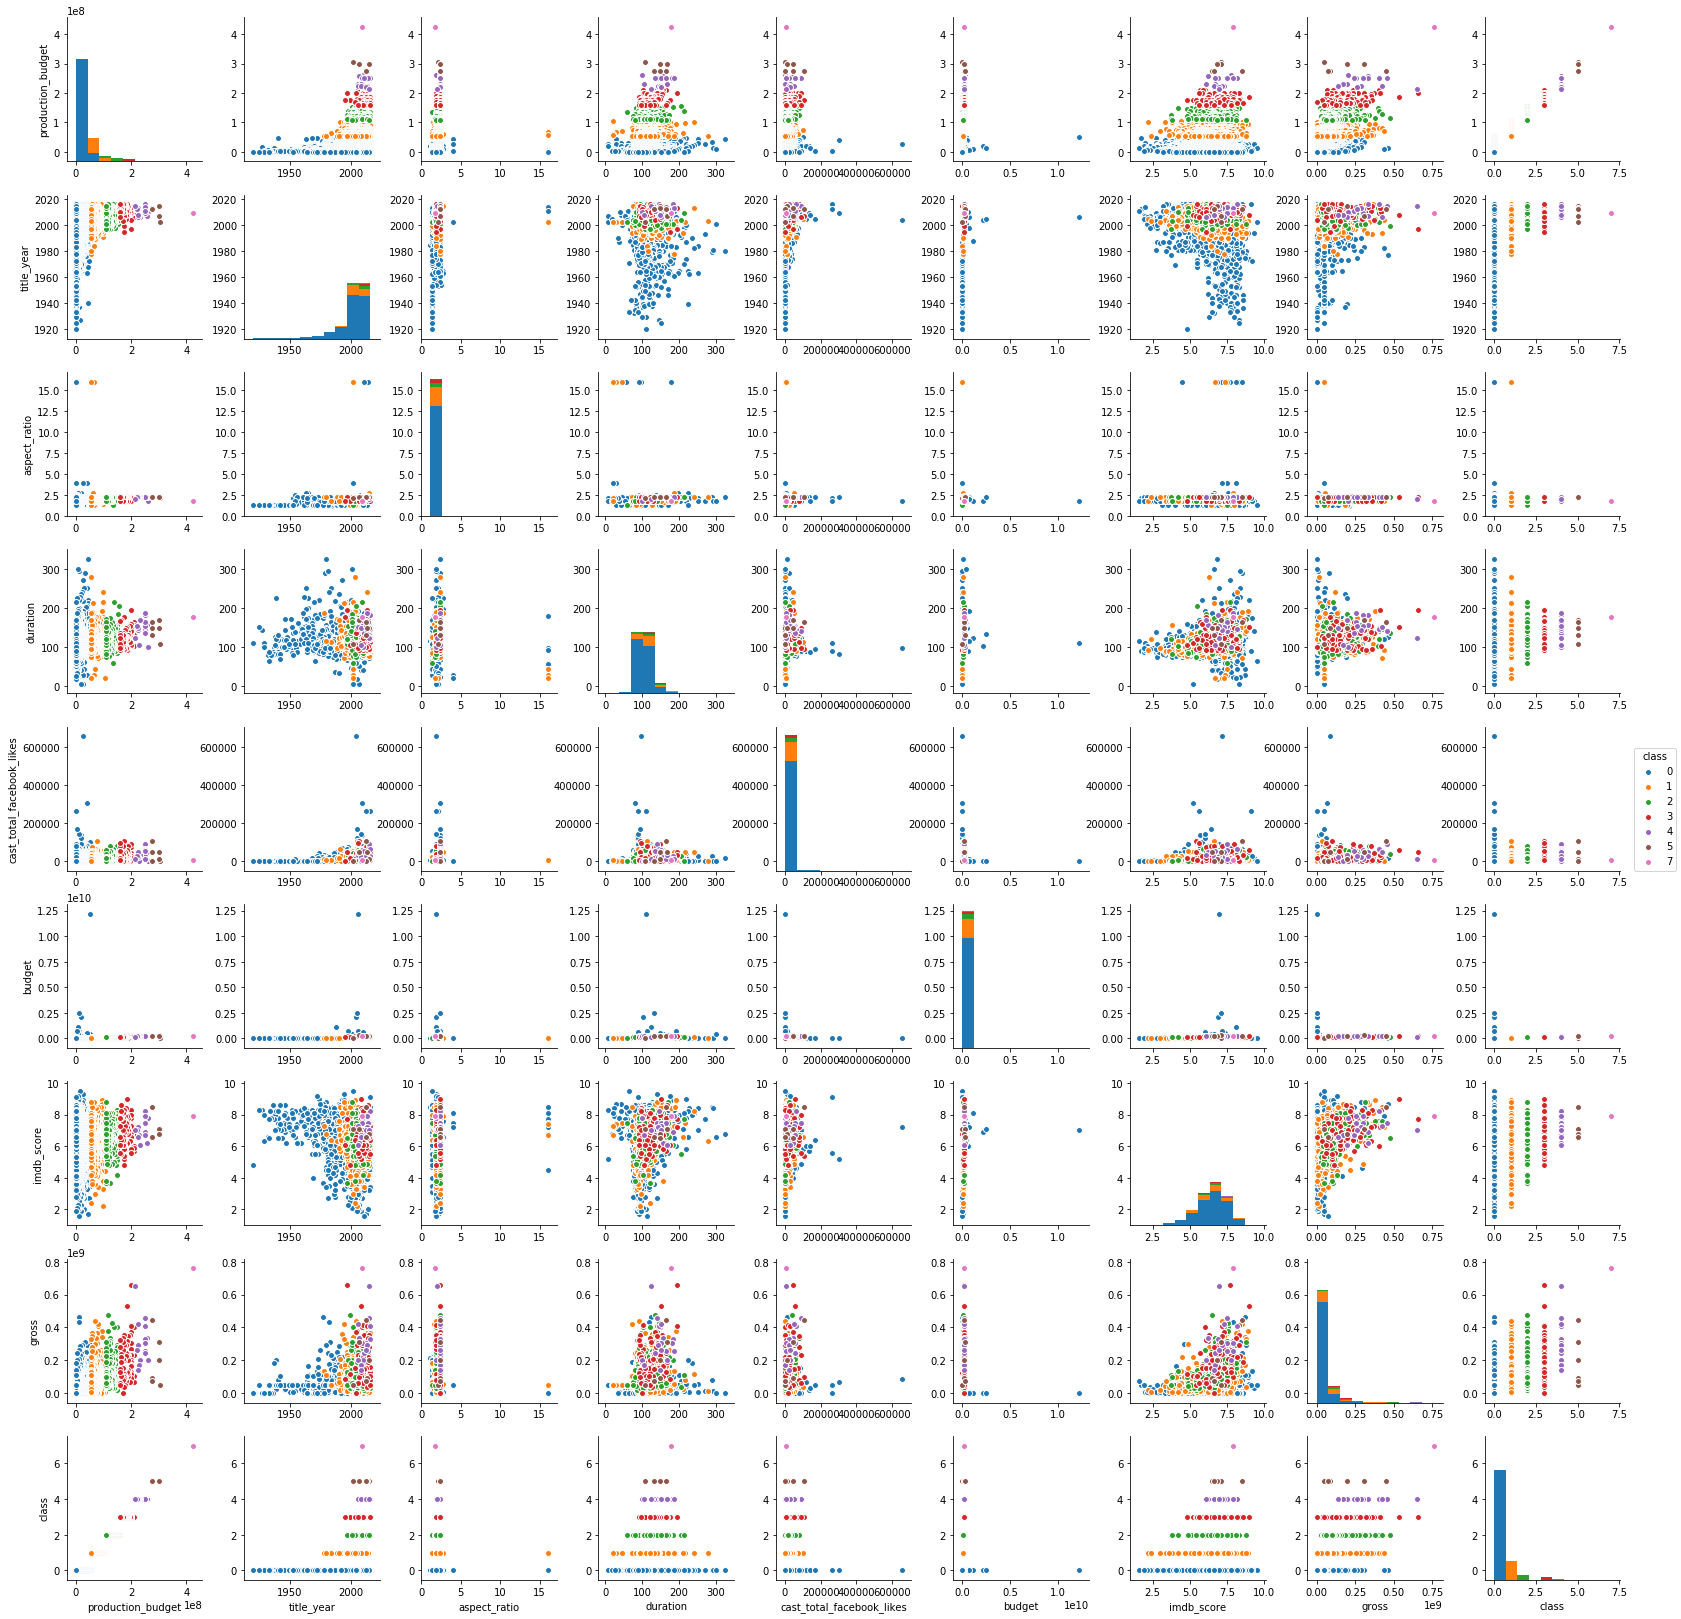

In [36]:
sns.pairplot(z2, hue = 'class')

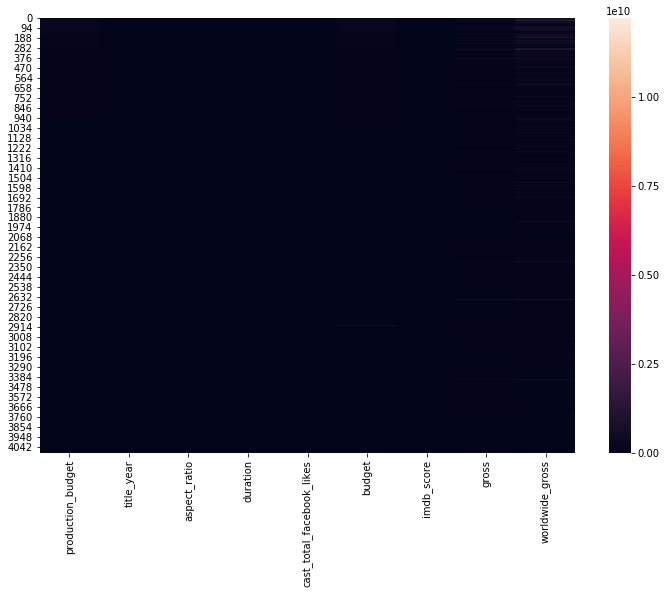

In [37]:
z3 = pd.concat([X,Y],axis=1)
sns.heatmap(z3)

# Metodos de seleccion automatica de features

In [40]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)

selector.fit(X,Y)

SelectKBest(k=4,
      score_func=<function mutual_info_regression at 0x7f78fc6d01e0>)

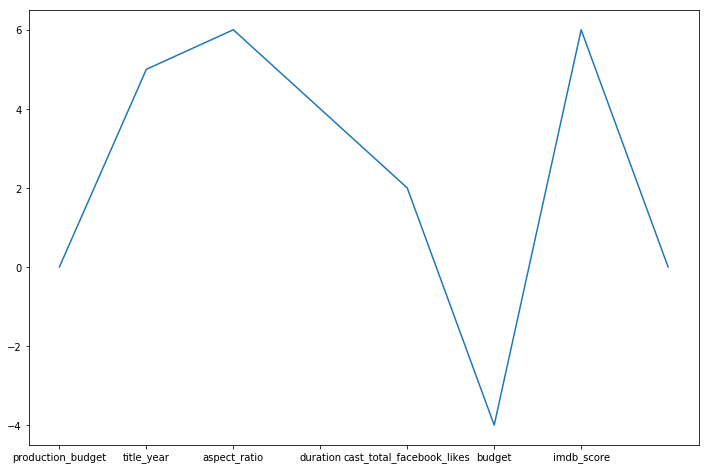

In [41]:
scores = selector.scores_
plt.rcParams['figure.figsize'] = [12,8]
plt.xticks(np.arange(7),list(X.columns))
plt.plot(var)

In [42]:
X2 = X[['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

cols2 = ['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test  = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test  = X_train[cols3], X_test[cols3], y_train, y_test


In [44]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

/home/mrromo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
print(model1.score(X_test, y_test))
print(model2.score(X2_test, y2_test))
print(model3.score(X3_test, y3_test))

0.882359315545
0.611569541174
0.611466710493


# Escalamiento de los datos

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scaler.mean_

array([  3.34117600e+07,   2.00210587e+03,   2.12811012e+00,
         1.08209615e+02,   1.04357138e+04,   4.20953702e+07,
         6.46020143e+00,   4.84741293e+07])

In [50]:
scaler.scale_

array([  4.02676716e+07,   1.21539143e+01,   8.02620156e-01,
         2.30889581e+01,   1.97955430e+04,   2.32258874e+08,
         1.06043726e+00,   6.30581489e+07])

In [51]:
scaler.transform(X_train)

array([[ -4.57234283e-01,  -1.98338347e+00,   2.76456900e-01, ...,
         -1.16660215e-01,   1.64064262e+00,  -2.45481976e-03],
       [ -4.57234283e-01,  -1.48971535e+00,  -3.46502785e-01, ...,
         -1.20965756e-01,   7.91936120e-01,   2.95419980e+00],
       [  2.39865471e+00,   6.49513162e-01,   2.76456900e-01, ...,
          2.92366137e-01,  -5.67703830e-02,   1.10750537e+00],
       ..., 
       [ -5.81403369e-01,   3.20401083e-01,  -3.46502785e-01, ...,
         -1.38187918e-01,  -2.45371828e-01,   5.02333391e-01],
       [  2.27448562e+00,  -4.20101093e-01,  -3.46502785e-01, ...,
          3.56949246e-01,  -2.60288989e+00,   9.32645119e-01],
       [ -4.57234283e-01,  -1.73267034e-01,  -3.46502785e-01, ...,
         -1.16660215e-01,   3.20432507e-01,  -2.33165031e-01]])

In [52]:
X_train_scaled, X_test_scaled = (scaler.transform(X_train), scaler.transform(X_test))

In [57]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train,y_train)

model_scaled = Lasso()
model_scaled.fit(X_train_scaled,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
print(model.score(X_test,y_test))
print(model_scaled.score(X_test_scaled, y_test))

0.882359315545
0.882359314329


# Simplificar transformaciones con pipelines

In [61]:
from sklearn.pipeline import make_pipeline

model_scaled = make_pipeline(StandardScaler(),
                             Lasso())
model_scaled.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [64]:
model_scaled.score(X_test, y_test)

0.8823593143288565

# Creacion de nuevas features

In [66]:
A = np.arange(6).reshape(3,2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [69]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2)
transformer.fit_transform(A)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

In [72]:

transformer = PolynomialFeatures(2)
transformer.fit_transform(X).shape

(4104, 45)

In [73]:
model_poly = make_pipeline(PolynomialFeatures(2),
                           Lasso())
model_poly.fit(X_train,y_train)
model_poly.score(X_test,y_test)

/home/mrromo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.90804991026637327

In [77]:
model_poly.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [78]:
X.corr()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
production_budget,1.000000,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154,0.642562
title_year,0.207884,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685,0.014154
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765,0.030225
duration,0.276407,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642,0.238216
cast_total_facebook_likes,0.236820,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663,0.208941
budget,0.185357,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417,0.102666
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000,0.201331
gross,0.642562,0.014154,0.030225,0.238216,0.208941,0.102666,0.201331,1.000000


# Encoding de  Categorias 

In [94]:
categoricals = pd.read_csv('categoricals.csv').set_index('Unnamed: 0')
categoricals.head(2)


,actor_1_name,director_name
Unnamed: 0,,
0,CCH Pounder,James Cameron
1,Doug Walker,Doug Walker


In [95]:
categoricals = categoricals.reset_index(drop=True).fillna(0)

In [96]:
X_binenc = pd.concat([X,categoricals],axis=1)

In [97]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['actor_1_name','director_name'])

In [98]:
encoder.fit_transform(X_binenc).shape


(4104, 32)

In [99]:
X_binenc = encoder.fit_transform(X_binenc)

In [101]:
Xb_train, Xb_test, y_train, y_test = train_test_split(X_binenc,Y)
X_train, X_test = (Xb_train[X.columns],Xb_test[X.columns])
model_binenc = Lasso()
model = Lasso()
model_binenc.fit(Xb_train,y_train)
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
print(model_binenc.score(Xb_test,y_test))
print(model.score(X_test,y_test))

0.873075491848
0.87417030071
